In [287]:
import datetime as dt

import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from torch import Tensor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from torch import nn

In [288]:
raw_data = pd.read_csv('data/train.csv')

In [289]:
numeric_columns = []
numeric_columns.extend(
    list(raw_data.dtypes[raw_data.dtypes == np.int64].index)
)
numeric_columns.extend(
    list(raw_data.dtypes[raw_data.dtypes == np.float64].index)
)

In [290]:
numeric_columns.remove('SalePrice')
numeric_columns.append('SalePrice')

In [291]:
numeric_columns.remove('Id')

In [292]:
numeric_data = pd.DataFrame(raw_data, columns=numeric_columns)

In [257]:
nan_columns = np.any(pd.isna(numeric_data), axis=0)
nan_columns = list(nan_columns[nan_columns == True].index)
nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [258]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
numeric_data[numeric_columns] = imputer.fit_transform(numeric_data[numeric_columns])

In [259]:
numeric_x_columns = list(numeric_data.columns)
numeric_x_columns.remove('SalePrice')
numeric_y_columns = ['SalePrice']
numeric_x_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [260]:
numeric_x_df = pd.DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = pd.DataFrame(numeric_data, columns=numeric_y_columns)
numeric_x_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,65.0,196.0,2003.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,80.0,0.0,1976.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,68.0,162.0,2001.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,60.0,0.0,1998.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,953.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,62.0,0.0,1999.0
1456,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,85.0,119.0,1978.0
1457,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,66.0,0.0,1941.0
1458,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,1078.0,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,68.0,0.0,1950.0


In [261]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super().__init__()

        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
    
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred

In [262]:
H1, H2, H3 = 500, 1000, 200

In [272]:
scaler = MinMaxScaler()
numeric_data[numeric_columns] = scaler.fit_transform(numeric_data[numeric_columns])
numeric_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,0.140098,...,0.0,0.0,0.0,0.00000,0.090909,0.50,0.207668,0.122500,0.996517,0.241078
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.000000,0.121575,0.206547,...,0.0,0.0,0.0,0.00000,0.363636,0.25,0.255591,0.000000,0.983085,0.203583
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.000000,0.185788,0.150573,...,0.0,0.0,0.0,0.00000,0.727273,0.50,0.217252,0.101250,0.995522,0.261908
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.000000,0.231164,0.123732,...,0.0,0.0,0.0,0.00000,0.090909,0.00,0.191693,0.000000,0.994030,0.145952
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.000000,0.209760,0.187398,...,0.0,0.0,0.0,0.00000,1.000000,0.50,0.268371,0.218750,0.995025,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.407962,0.155974,...,0.0,0.0,0.0,0.00000,0.636364,0.25,0.198083,0.000000,0.994527,0.194556
1456,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.139972,0.110583,0.252140,0.252373,...,0.0,0.0,0.0,0.00000,0.090909,1.00,0.271565,0.074375,0.984080,0.243161
1457,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.048724,0.000000,0.375428,0.188543,...,0.0,0.0,0.0,0.16129,0.363636,1.00,0.210863,0.000000,0.965672,0.321622
1458,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.008682,0.698100,0.000000,0.176432,...,0.0,0.0,0.0,0.00000,0.272727,1.00,0.217252,0.000000,0.970149,0.148903


In [281]:
numeric_x_df = pd.DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = pd.DataFrame(numeric_data, columns=numeric_y_columns)

In [282]:
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

In [283]:
D_in, D_out = numeric_x.shape[1], numeric_y.shape[1]
D_in, D_out

(36, 1)

In [284]:
model2 = Net(D_in, H1, H2, H3, D_out)
loss_fn = nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-4)

In [285]:
losses2 = []
for t in range(500):
    y_pred = model2(numeric_x)
    loss = loss_fn(y_pred, numeric_y)
    print(t, loss.item())
    losses2.append(loss.item())

    if torch.isnan(loss):
        print('breaking')
        break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 113.99256134033203
1 20.794843673706055
2 14.093978881835938
3 12.783961296081543
4 12.465448379516602
5 12.213265419006348
6 11.97393798828125
7 11.739977836608887
8 11.511957168579102
9 11.289830207824707
10 11.073020935058594
11 10.861021995544434
12 10.653883934020996
13 10.450764656066895
14 10.252313613891602
15 10.058062553405762
16 9.867847442626953
17 9.681144714355469
18 9.498234748840332
19 9.320109367370605
20 9.146644592285156
21 8.978070259094238
22 8.814212799072266
23 8.655290603637695
24 8.500822067260742
25 8.351016998291016
26 8.205601692199707
27 8.064388275146484
28 7.927493572235107
29 7.794877052307129
30 7.666386127471924
31 7.542092800140381
32 7.421725749969482
33 7.305269718170166
34 7.192659378051758
35 7.083833694458008
36 6.978629112243652
37 6.876729488372803
38 6.778182029724121
39 6.683109760284424
40 6.591508388519287
41 6.503299713134766
42 6.418173789978027
43 6.336014270782471
44 6.256806373596191
45 6.180363655090332
46 6.106645584106445
47 6.035

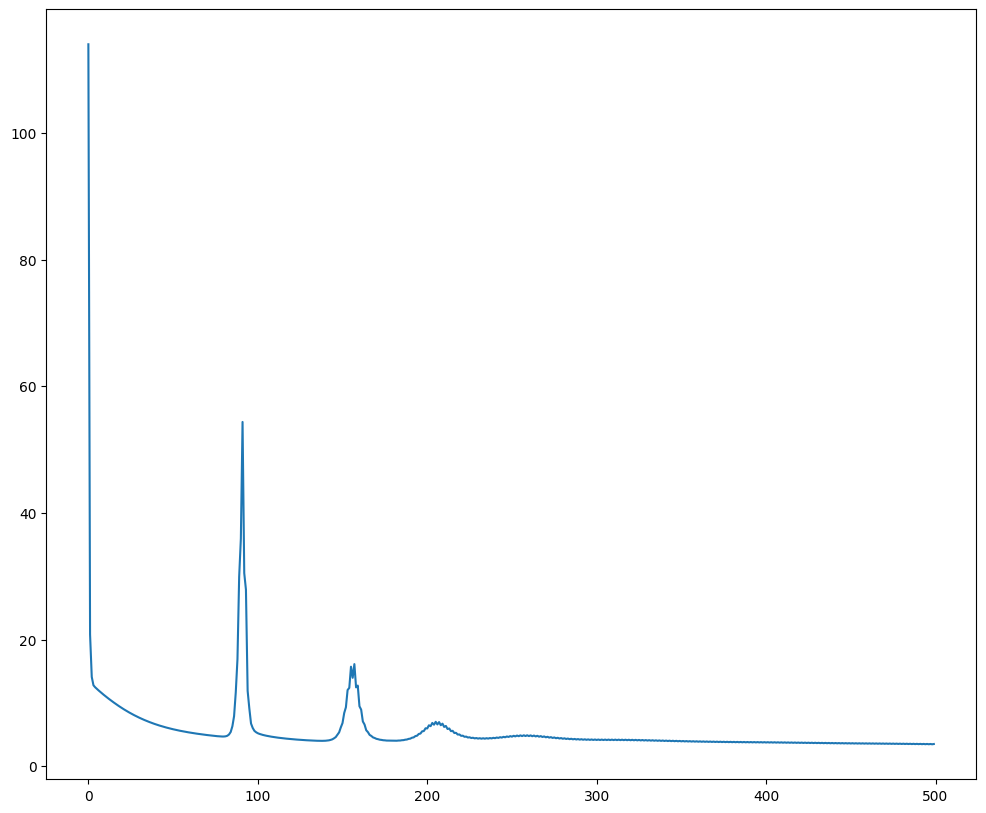

In [286]:
plt.figure(figsize=(12, 10))
plt.plot(range(len(losses2)), losses2)
plt.show()